In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churncsv/telecom_churn.csv


#  Visual data analysis in Python
## Part 1. Visualization: 
### from Simple Distributions to Dimensionality Reduction

In the field of Machine Learning, data visualization is not just making fancy graphics for reports; it is used extensively in day-to-day work for all phases of a project.

To start with, visual exploration of data is the first thing one tends to do when dealing with a new task. We do preliminary checks and analysis using graphics and tables to summarize the data and leave out the less important details.

Next, when we analyze the performance of a model or report results, we also often use charts and images. 



**visualization is a relatively fast way to learn something new about your data**.

Thus, it is vital to learn its most useful techniques and make them part of your everyday ML toolbox.

In this article, we are going to get hands-on experience with visual exploration of data using popular libraries such as pandas, matplotlib and seaborn.

## Article outline
  ### 1. Dataset
  ### 2. Univariate visualization
  -  Quantitative(numerical) features
  -  Categorical and binary features
  
### 3. Multivariate visualization
  - Qualitative vs. Quantitative
  - Quantitative vs. Categorical
  - Categorical vs. Categorical
  
### 4. Whole dataset visualizations

  -  Naive approach
  -  Dimensionality reduction
  


Before we get to the data, let's initialize our environment:

In [69]:
# we don't like warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'

## 1. Dataset


In the this article, we look at the data on customer churn for a telecom operator. 


In [70]:
df = pd.read_csv("/kaggle/input/telecom-churncsv/telecom_churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2.Univariate visualization
Univariate analysis looks at one feature at a time. 
When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

### 2.1 Quantitative features
Quantitative features take on ordered numerical values. 

#### Histograms and density plots
The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the Data Frame's method hist().

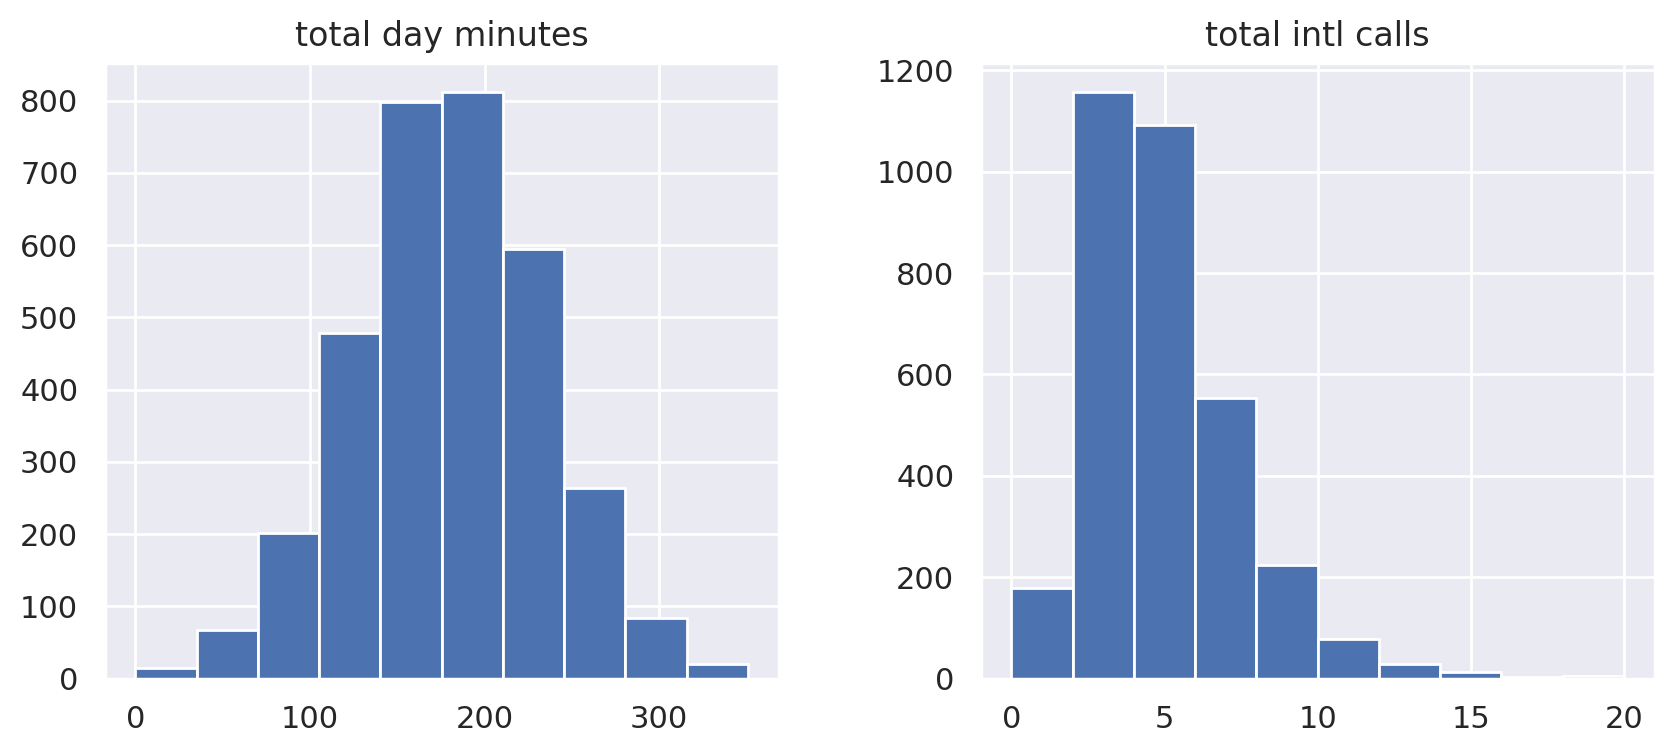

In [71]:
features = ["total day minutes", "total intl calls"]
df[features].hist(figsize=(10, 4));

A **histogram** groups values into bins of equal value range. 
The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. 
You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. 

Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

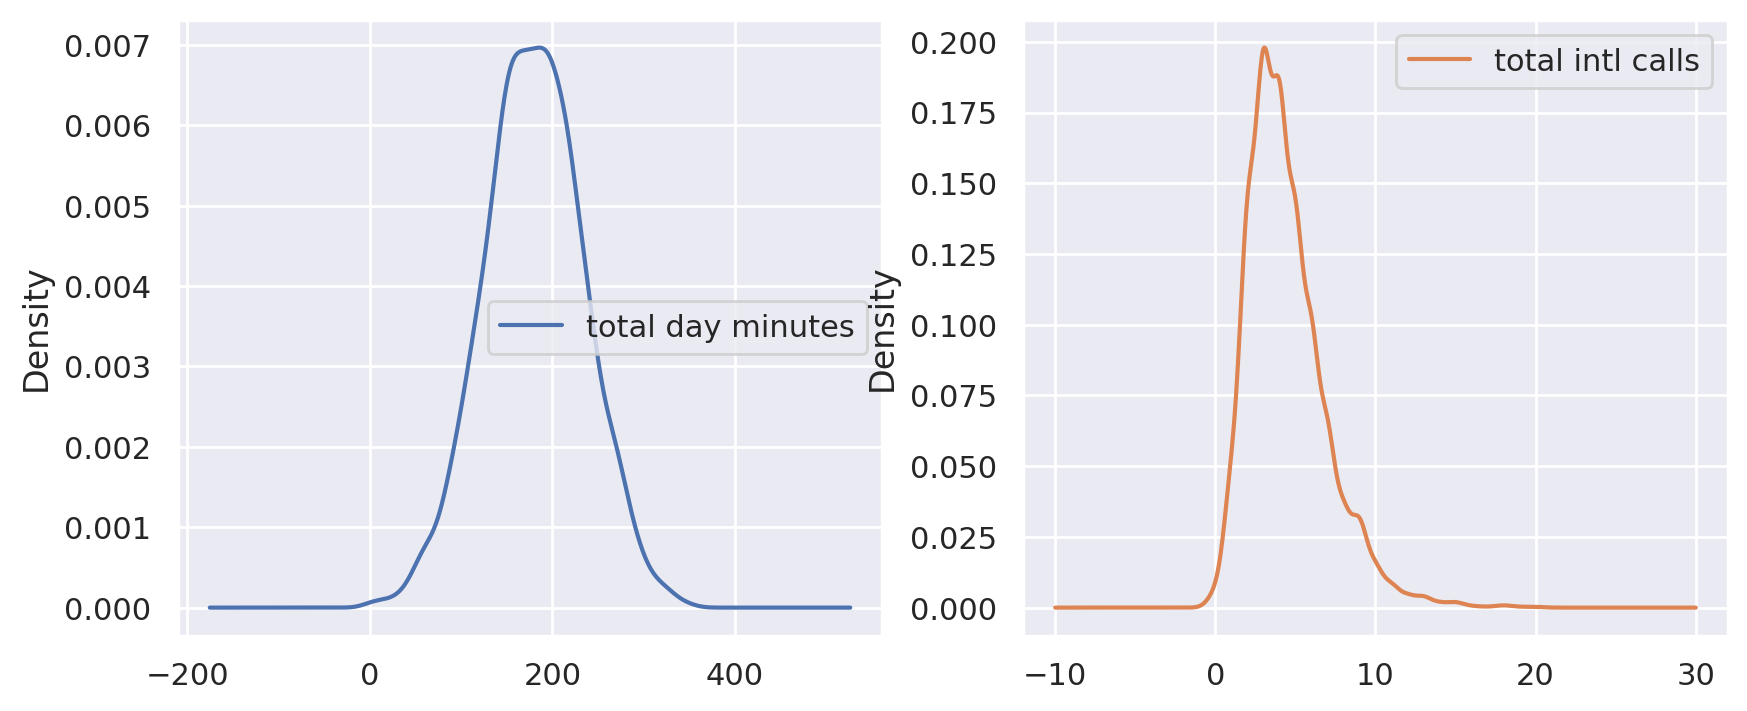

In [72]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

It is also possible to plot a distribution of observations with **seaborn** distplot().

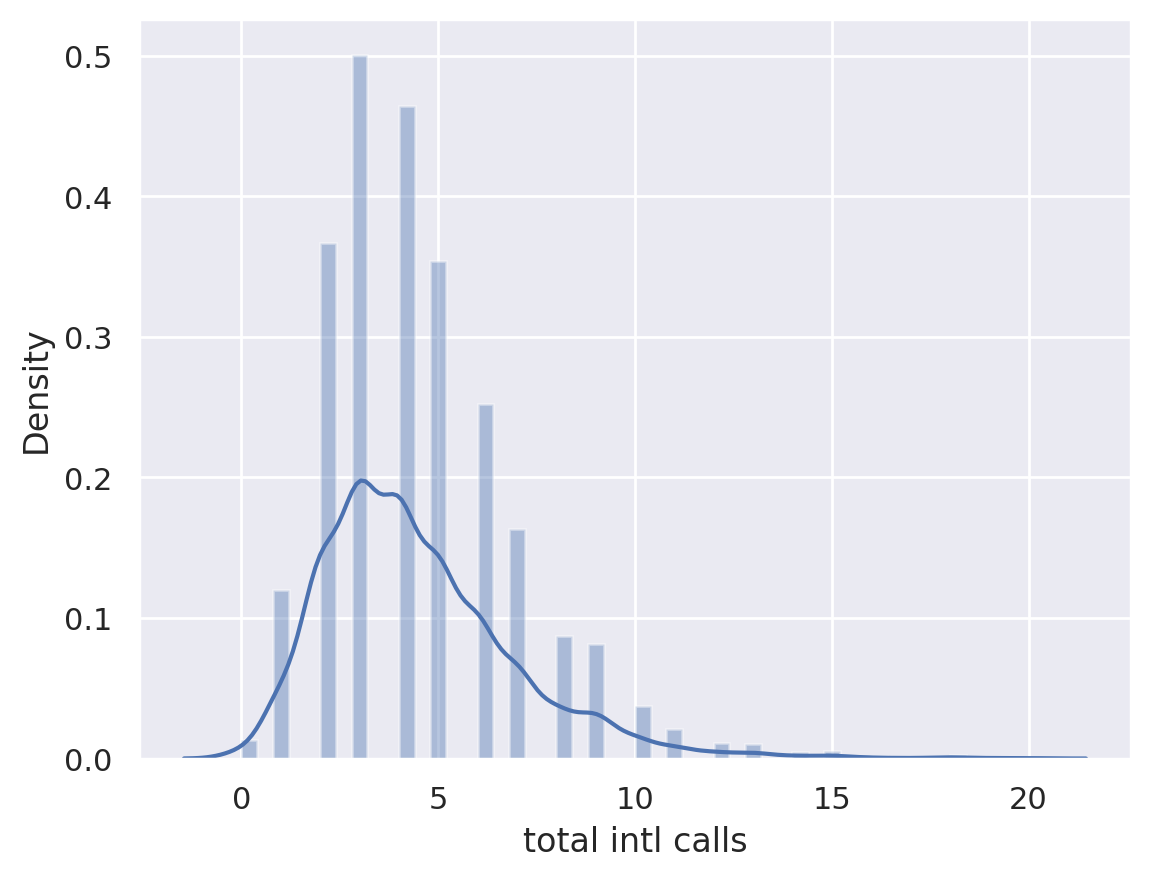

In [73]:
sns.distplot(df["total intl calls"]);

### Box plot
Another useful type of visualization is a box plot. 
**seaborn does a great job here**:

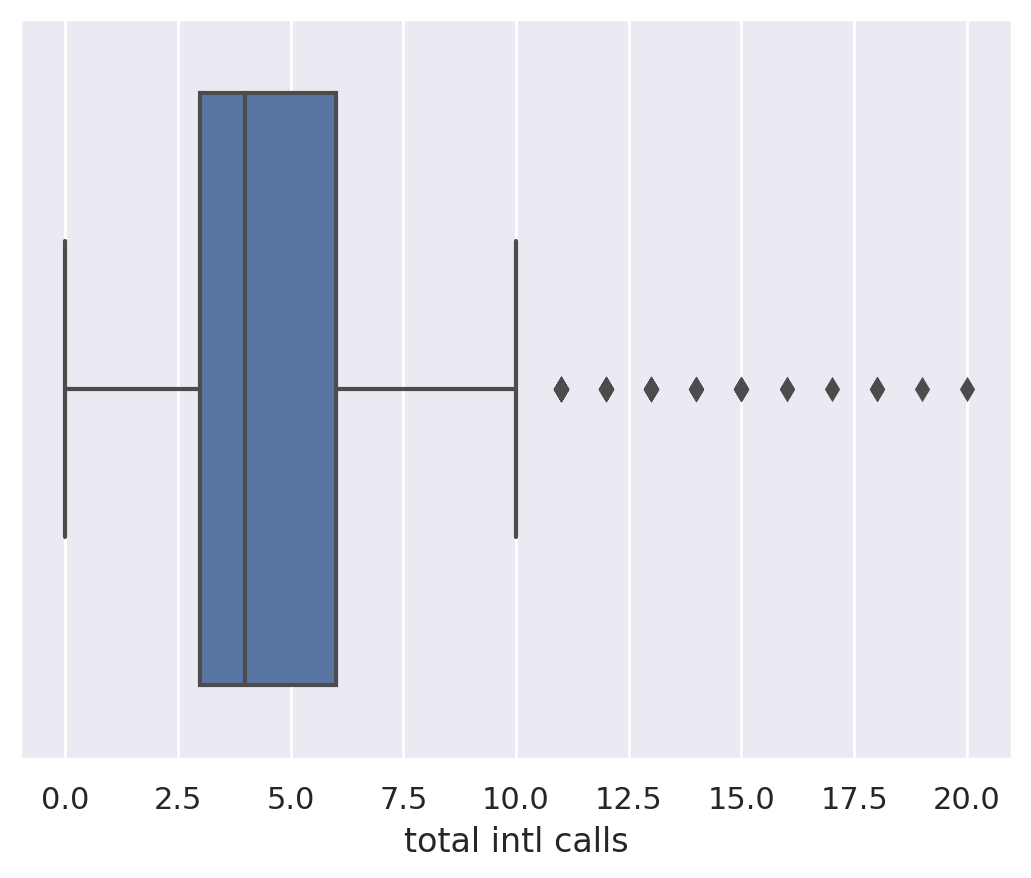

In [74]:
sns.boxplot(data=df,x="total intl calls" );

#### Violin plot
The last type of distribution plots that we will consider is a violin plot.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a violin plot with the kernel density estimate on both sides.

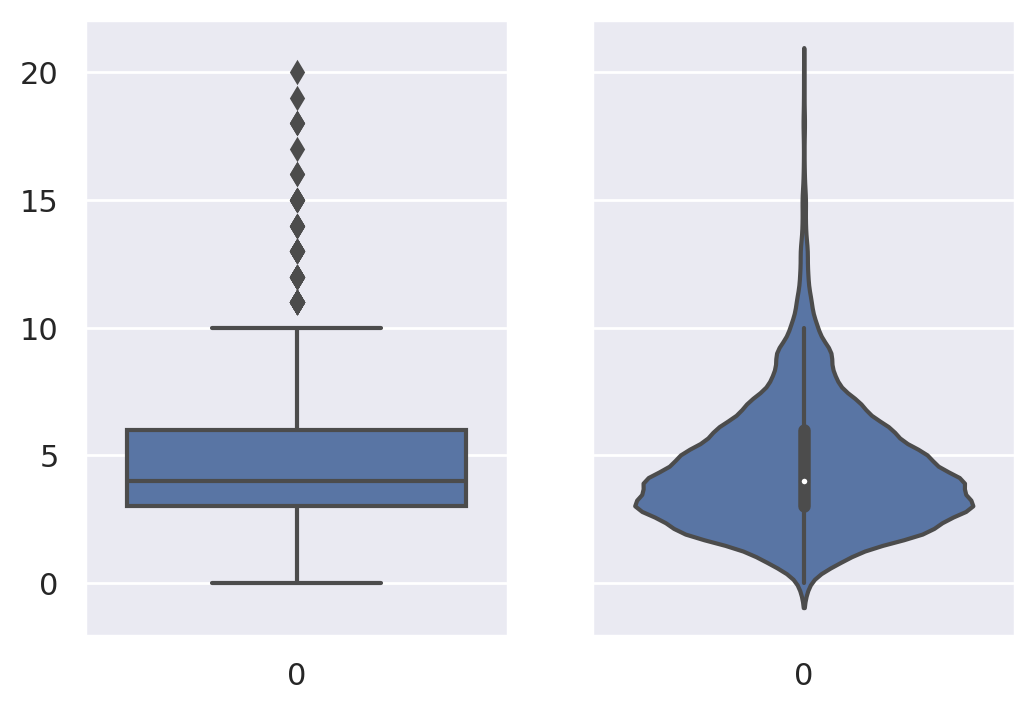

In [75]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["total intl calls"], ax=axes[0])
sns.violinplot(data=df["total intl calls"], ax=axes[1]);

### describe()
In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method describe() of a DataFrame:

In [76]:
df[features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


### 2.2 Categorical and binary features

#### Frequency table
Let's check the class balance in our dataset by looking at the distribution of the target variable.

In [77]:
df["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

### Bar plot
The bar plot is a graphical representation of the frequency table. 
The easiest way to create it is to use the seaborn's function count **plot()**.

 There is another function in seaborn that is somewhat confusingly called **barplot()** and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

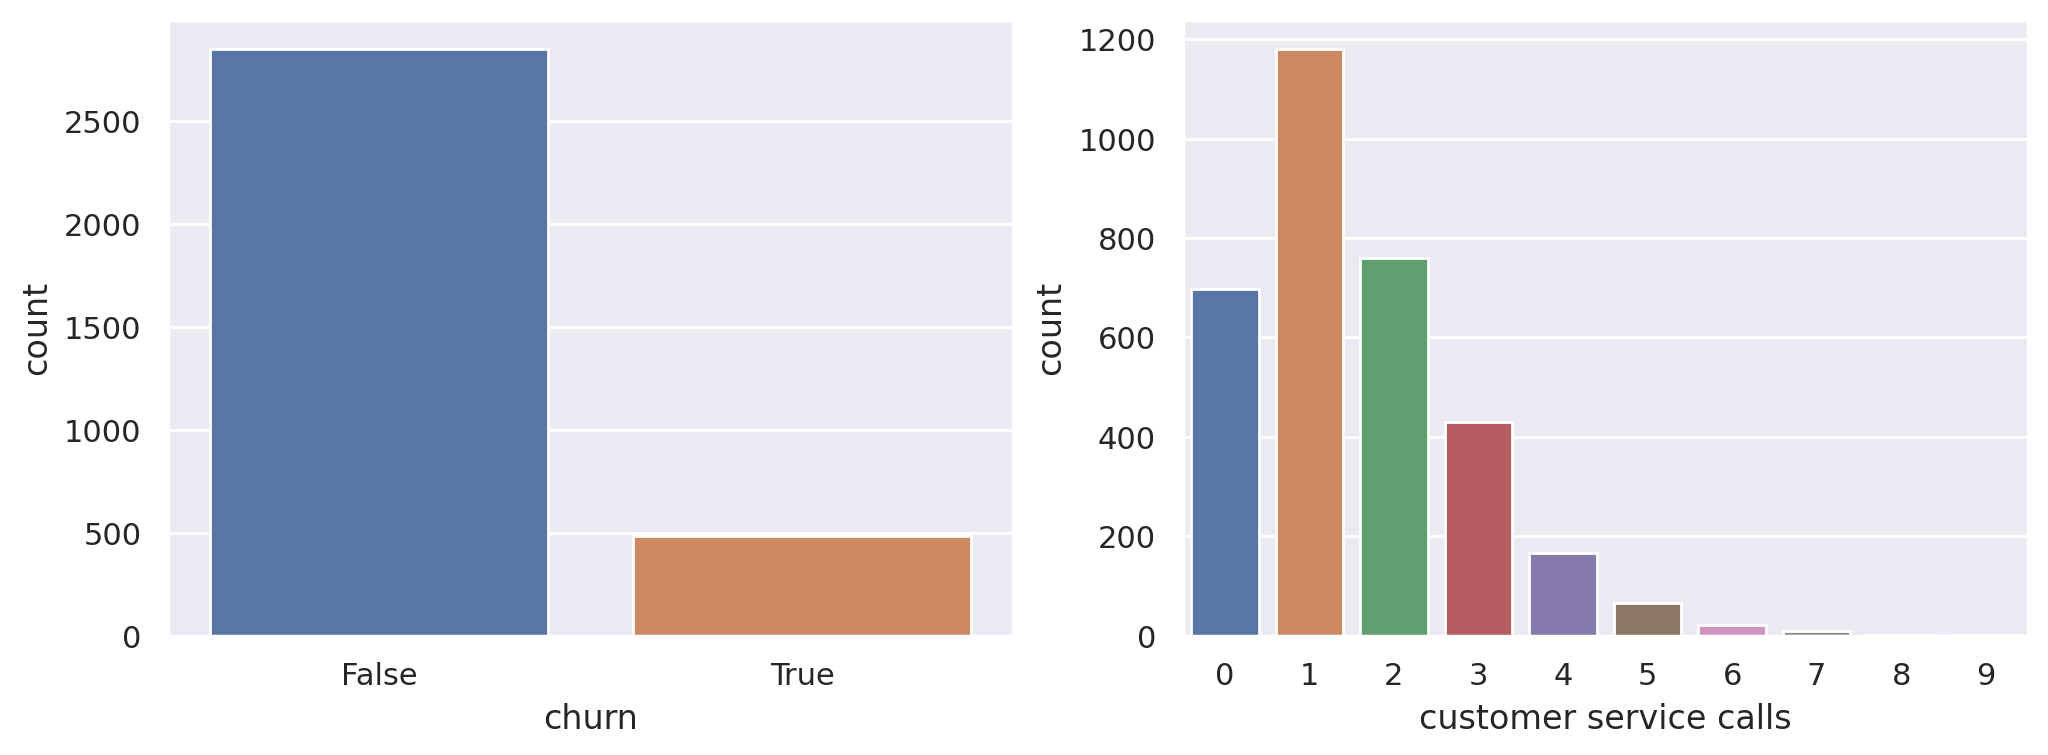

In [78]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="churn", data=df, ax=axes[0])
sns.countplot(x="customer service calls", data=df, ax=axes[1]);

**Histograms** are best suited for looking at the distribution of numerical variables while **bar plots** are used for categorical features.

## 3.Multivariate visualization¶
Multivariate plots allow us to see relationships between two and more different variables, all in one figure.

### 3.1 numerical vs. numerical 
#### **Correlation matrix**
Let's look at the correlations among the numerical variables in our dataset.

 This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method **corr()** on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to **heatmap()** from seaborn, which renders a color-coded matrix for the provided values

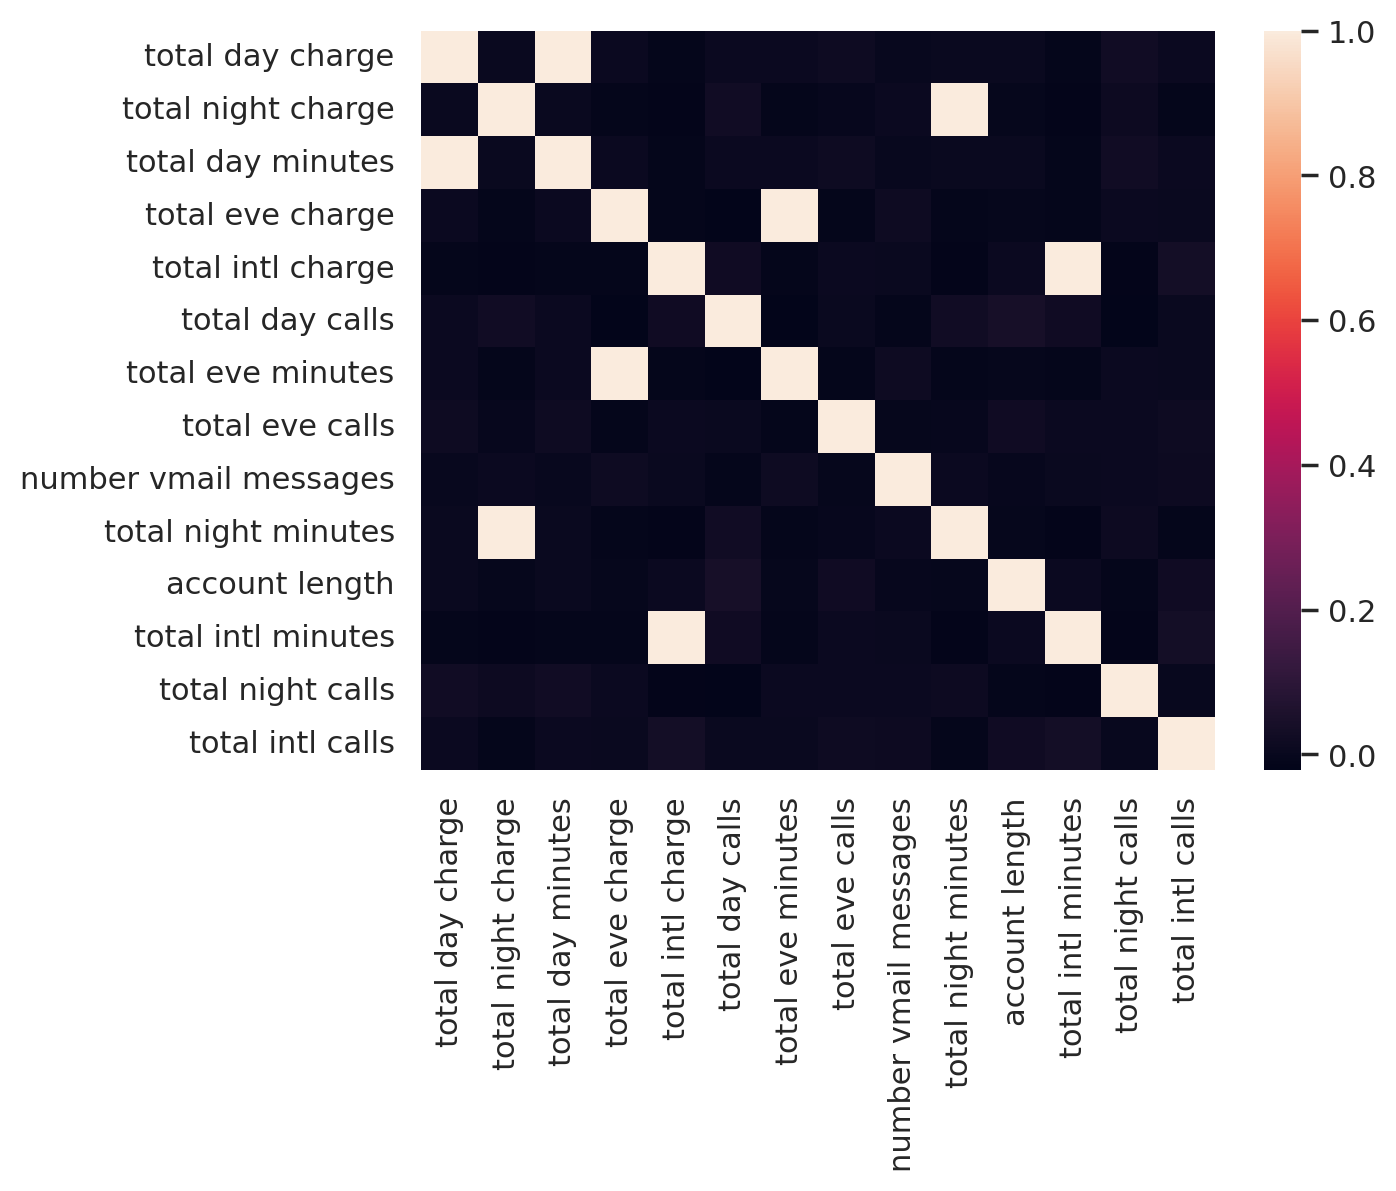

In [79]:
# Drop non-numerical variables
numerical = list(
    set(df.select_dtypes(include=[np.number]).columns)
    - {
        "state",
        "international plan",
        "voice mail plan",
        "area code",
        "churn",
        "customer service calls",
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);


From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [80]:
numerical = list(
    set(numerical)
    - {
        "total day charge",
        "total eve charge",
        "total night charge",
        "total intl charge",
    }
)

### Scatter plot
The scatter plot displays values of two numerical variables as Cartesian coordinates in **2D**  space. Scatter plots in **3D** are also possible.

Let's try out the function scatter() from the matplotlib library:

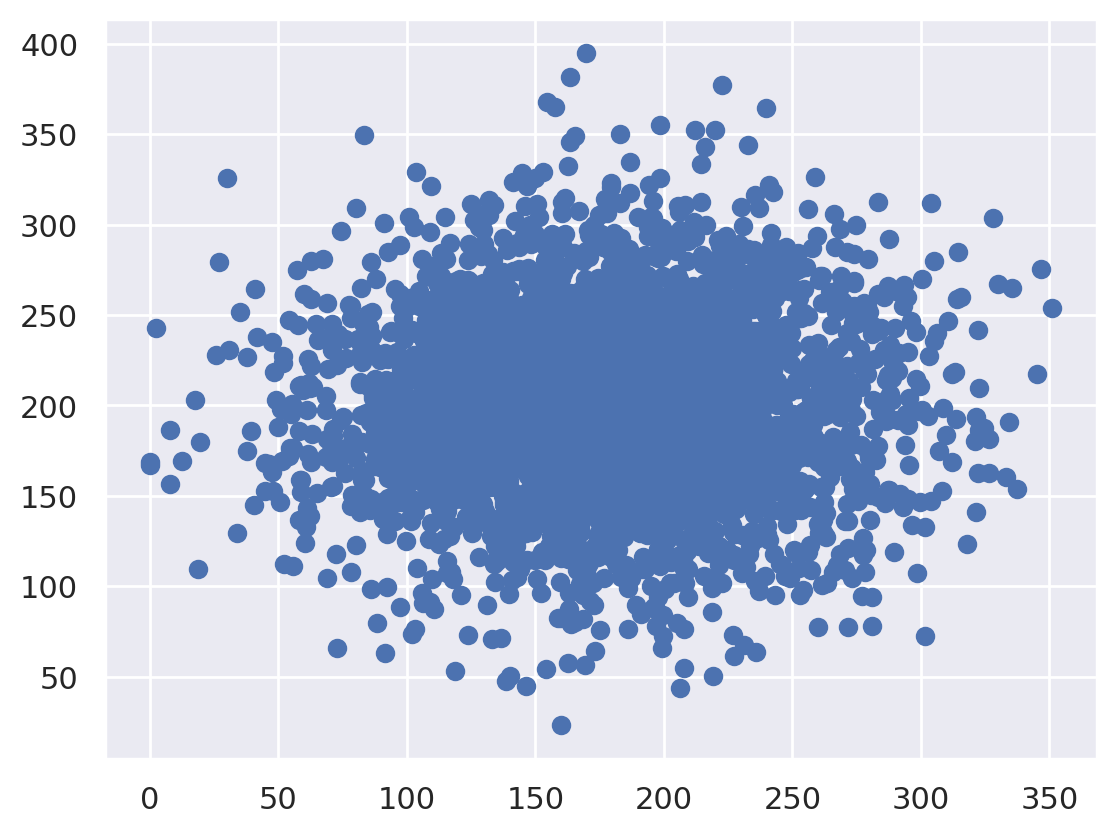

In [81]:
plt.scatter(df["total day minutes"], df["total night minutes"]);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the seaborn library:

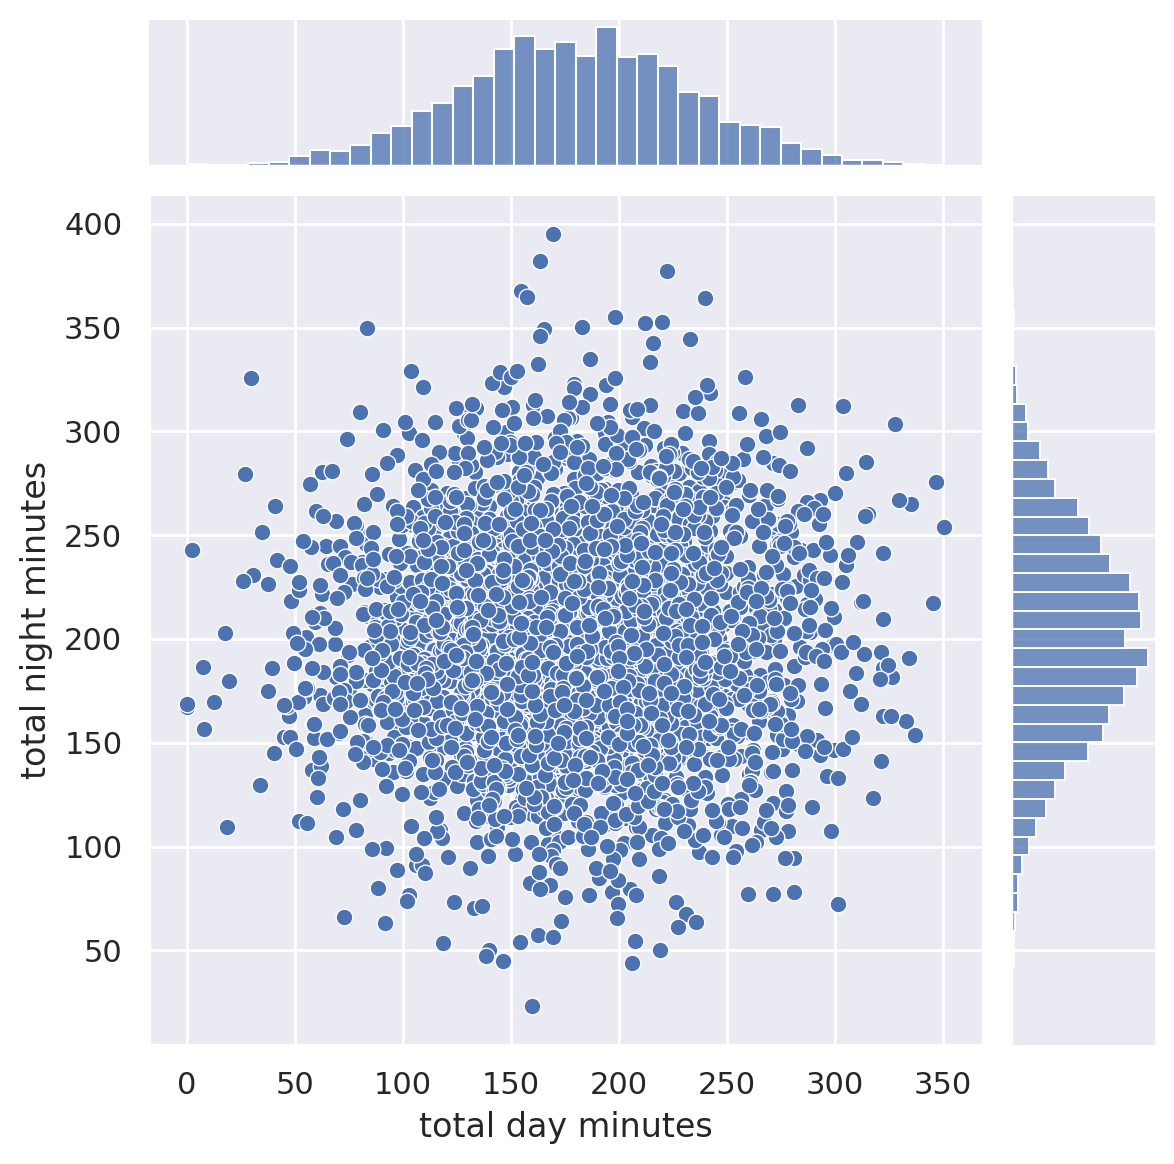

In [82]:
sns.jointplot(x="total day minutes", y="total night minutes", data=df, kind="scatter");

The **function joint plot()** plots two histograms that may be useful in some cases.

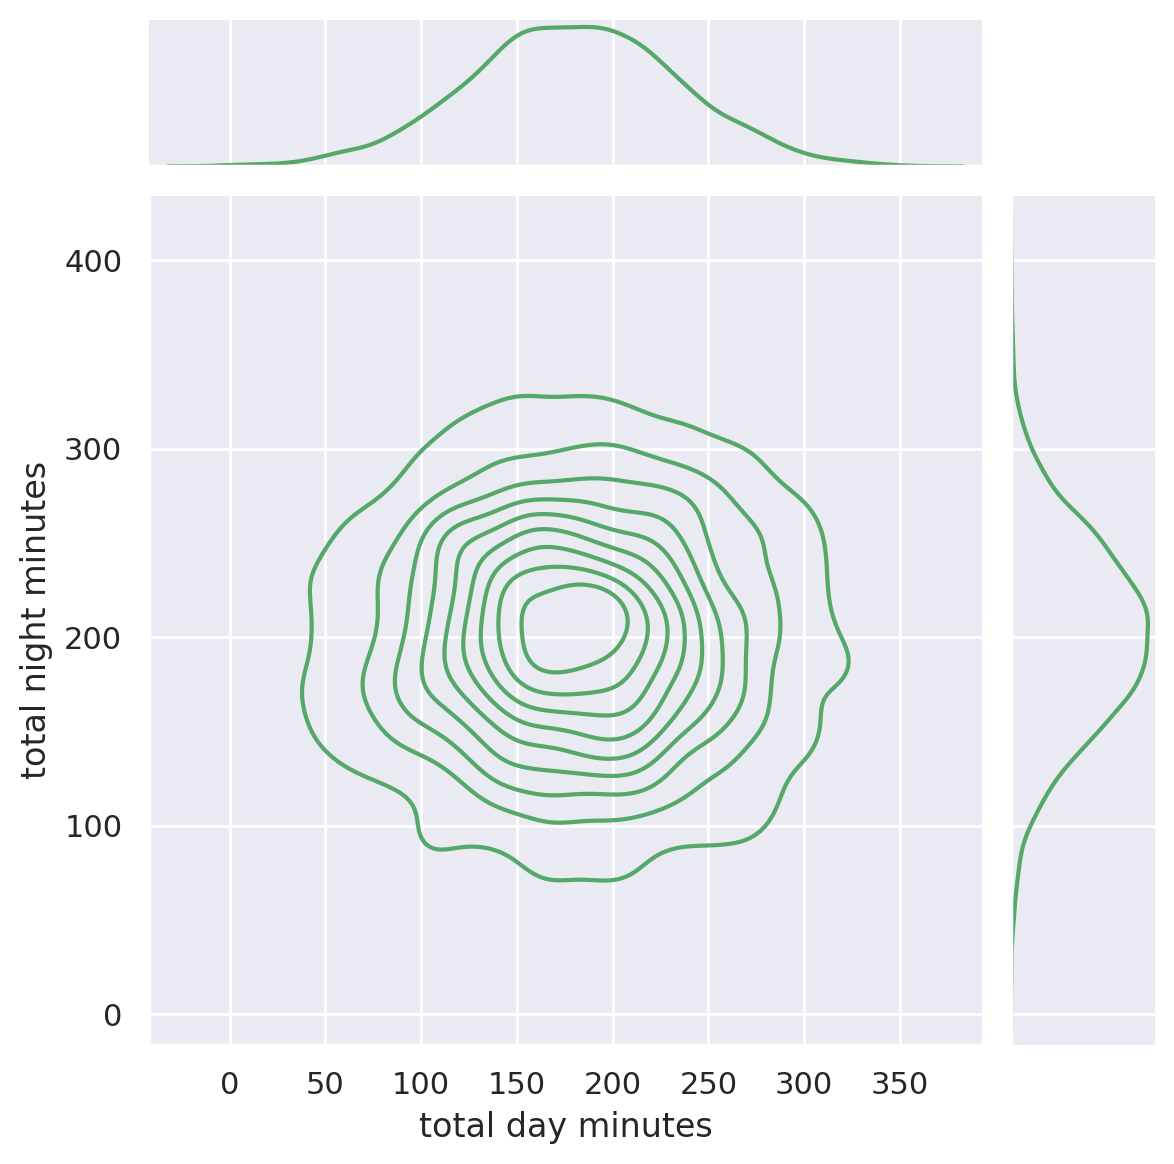

In [83]:
sns.jointplot(x="total day minutes", y="total night minutes", data=df, kind="kde", color="g")

### Scatterplot matrix
In some cases, we may want to plot a scatterplot matrix such as the one shown below. 

In [84]:
'''
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);
'''

"\n# `pairplot()` may become very slow with the SVG or retina format\n%config InlineBackend.figure_format = 'png'\nsns.pairplot(df[numerical]);\n"

### 3.2 numerical  vs. Categorical


 We can achieve this with the **scatter()** function seen above, but, let's try a new function called **import()** and use the parameter hue to indicate our categorical feature of interest:

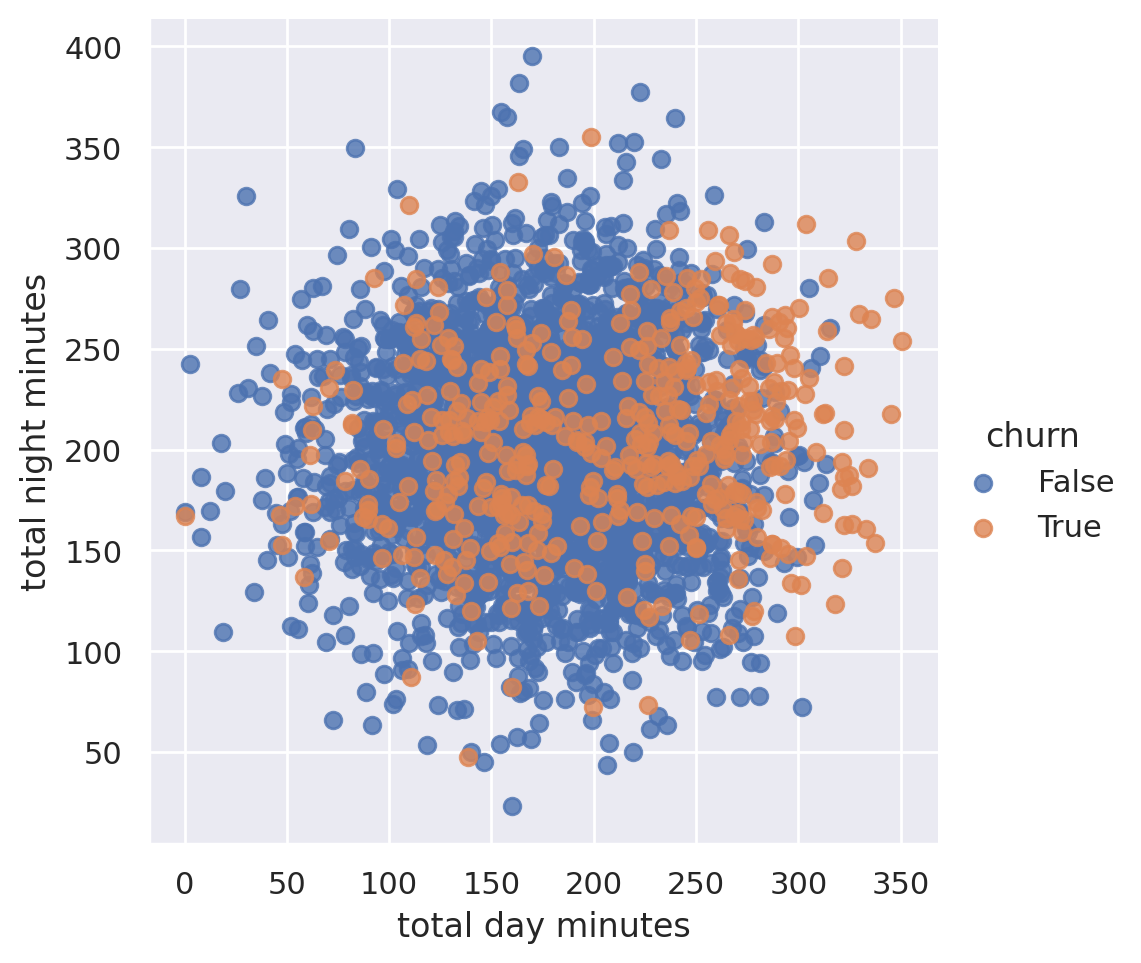

In [85]:
sns.lmplot(x="total day minutes", y="total night minutes", data=df, hue="churn", fit_reg=False);

Now, Let's create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (**Churn=False**) and those who left (**Churn=True**).

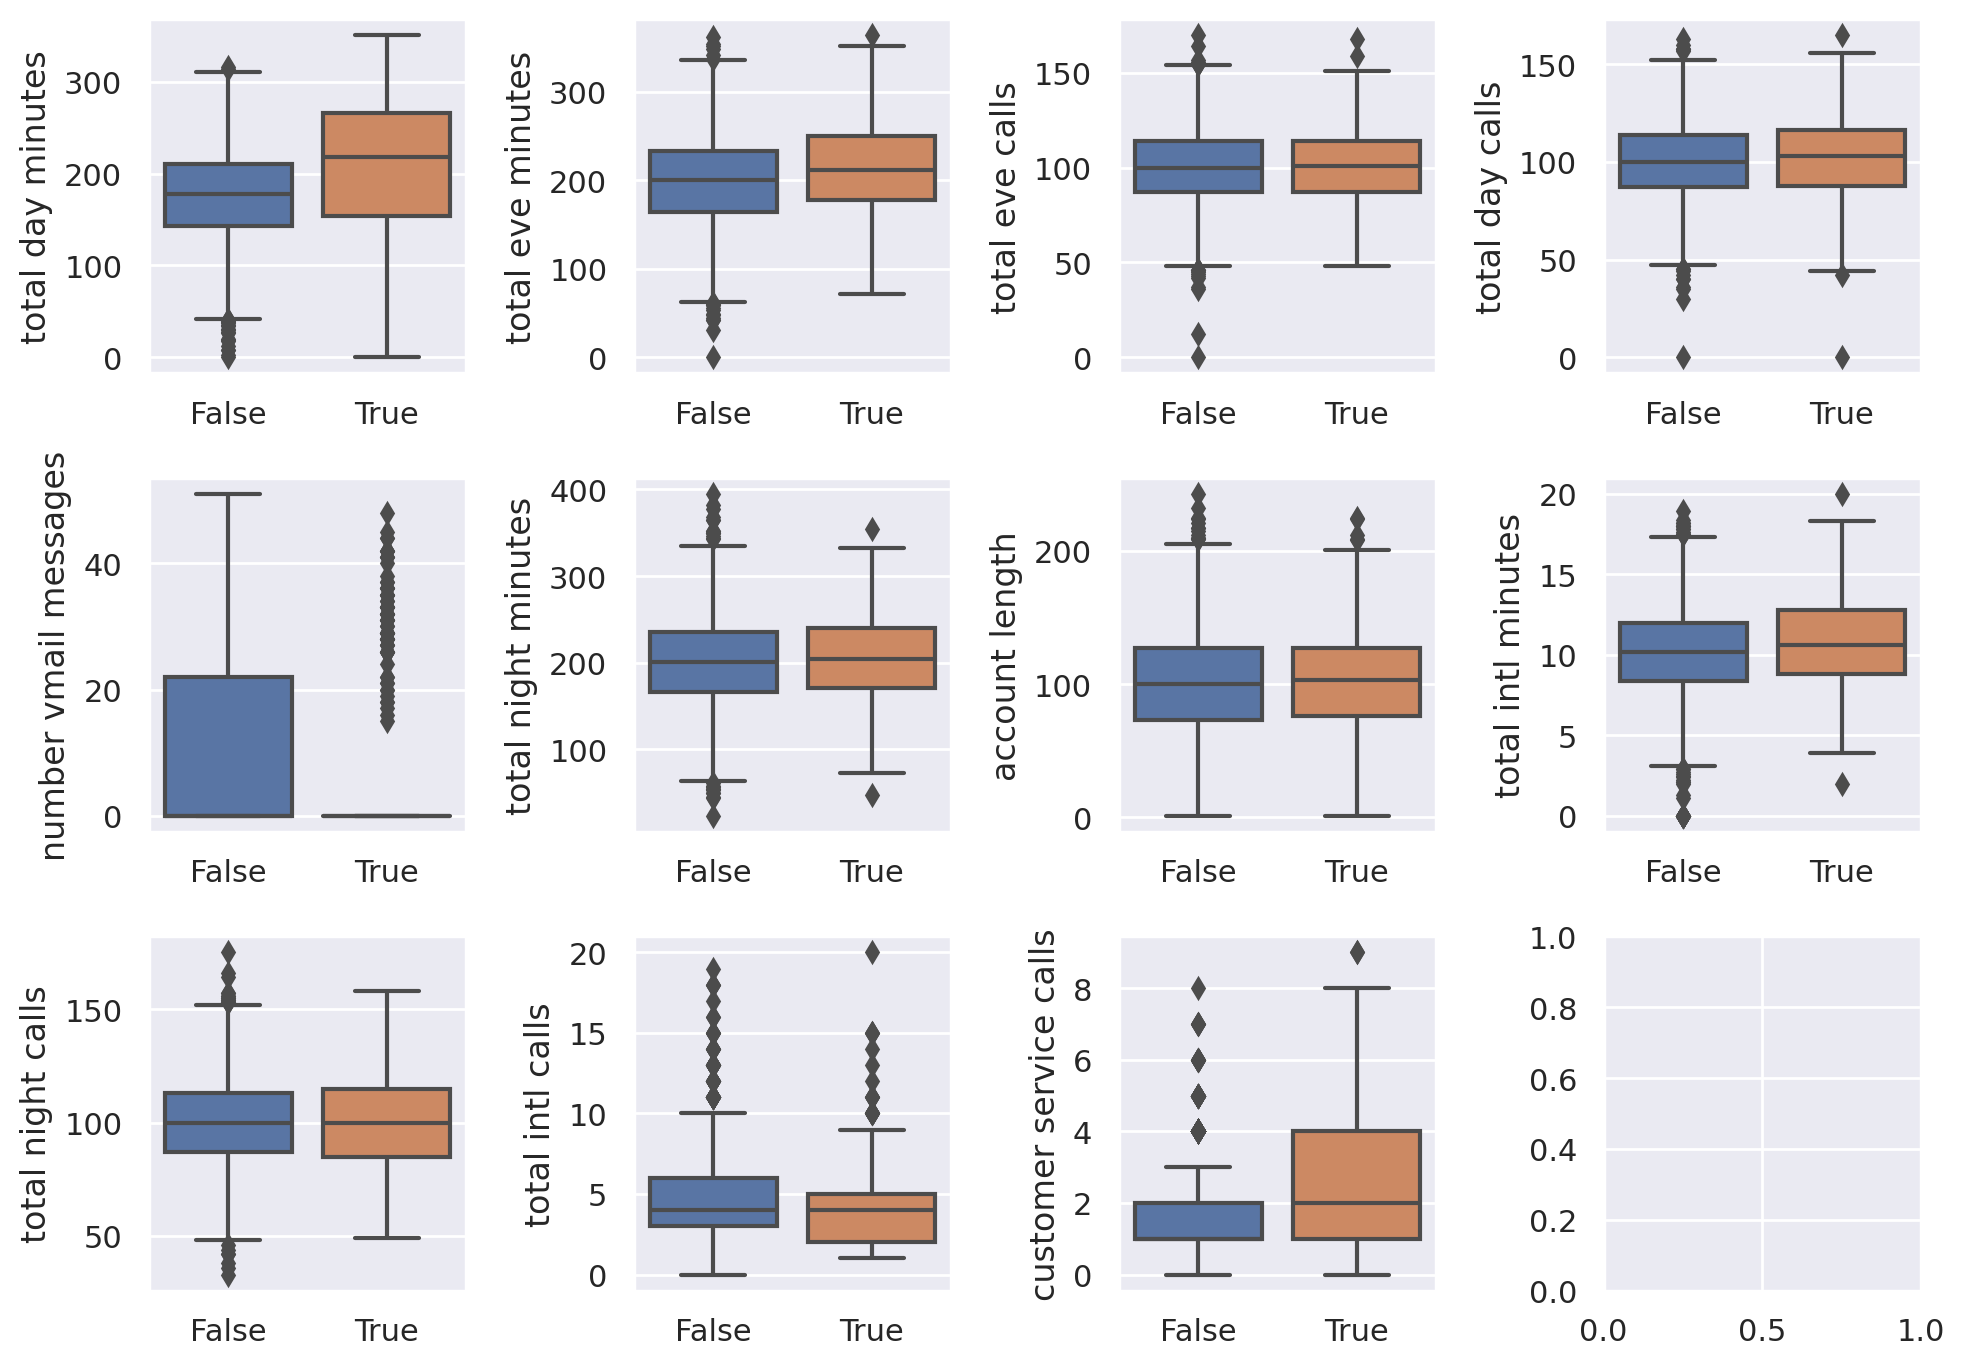

In [86]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: Total day minutes, Customer service calls, and Number vmail messages.

**We will create box and violin plots for Total day minutes grouped by the target variable.**

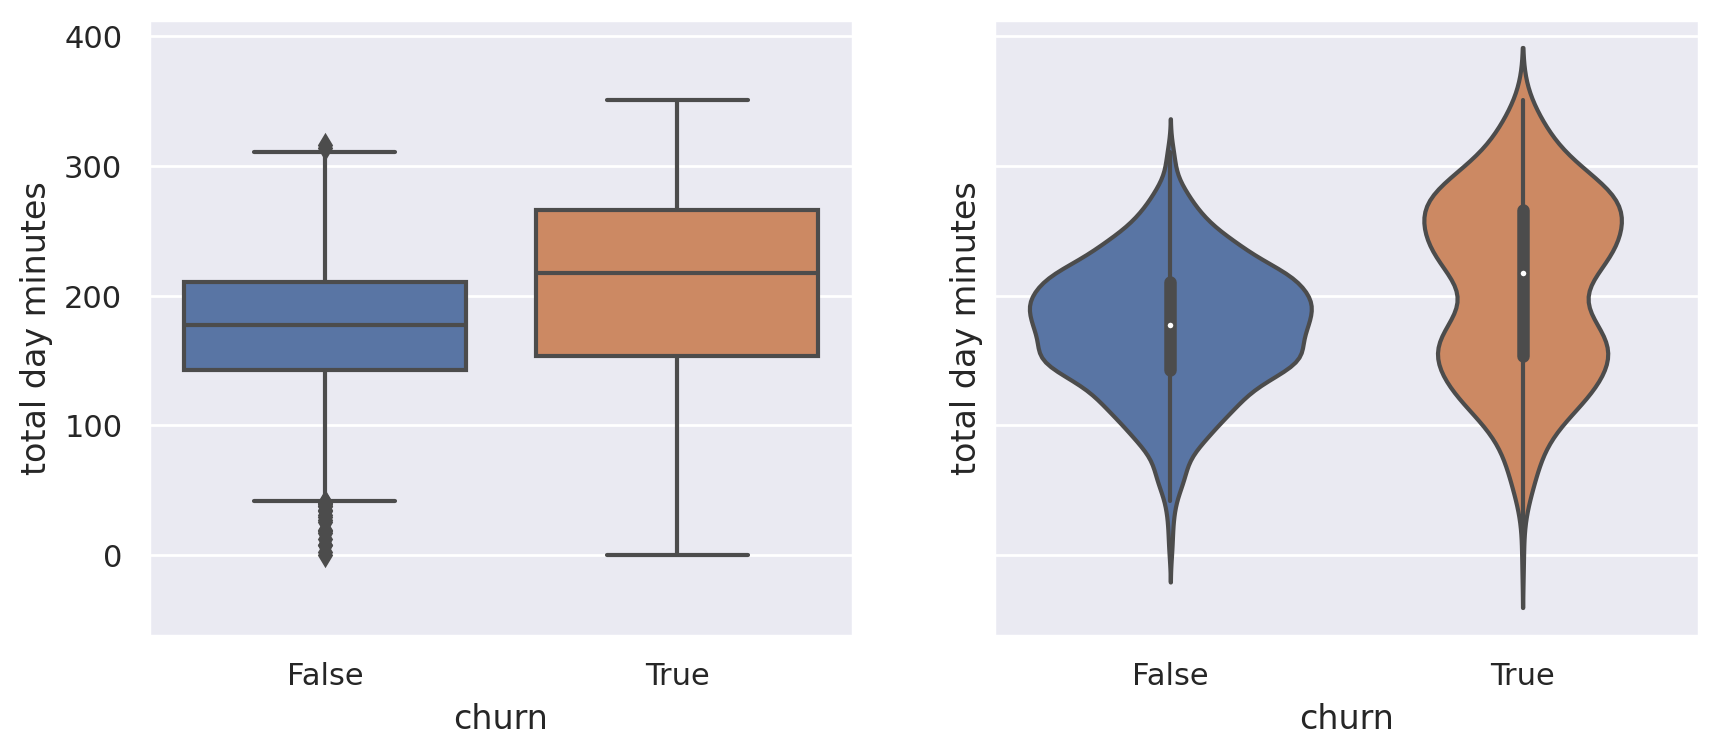

In [87]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="churn", y="total day minutes", data=df, ax=axes[0])
sns.violinplot(x="churn", y="total day minutes", data=df, ax=axes[1]);

When we want to analyze a numerical variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called **catplot()**. 

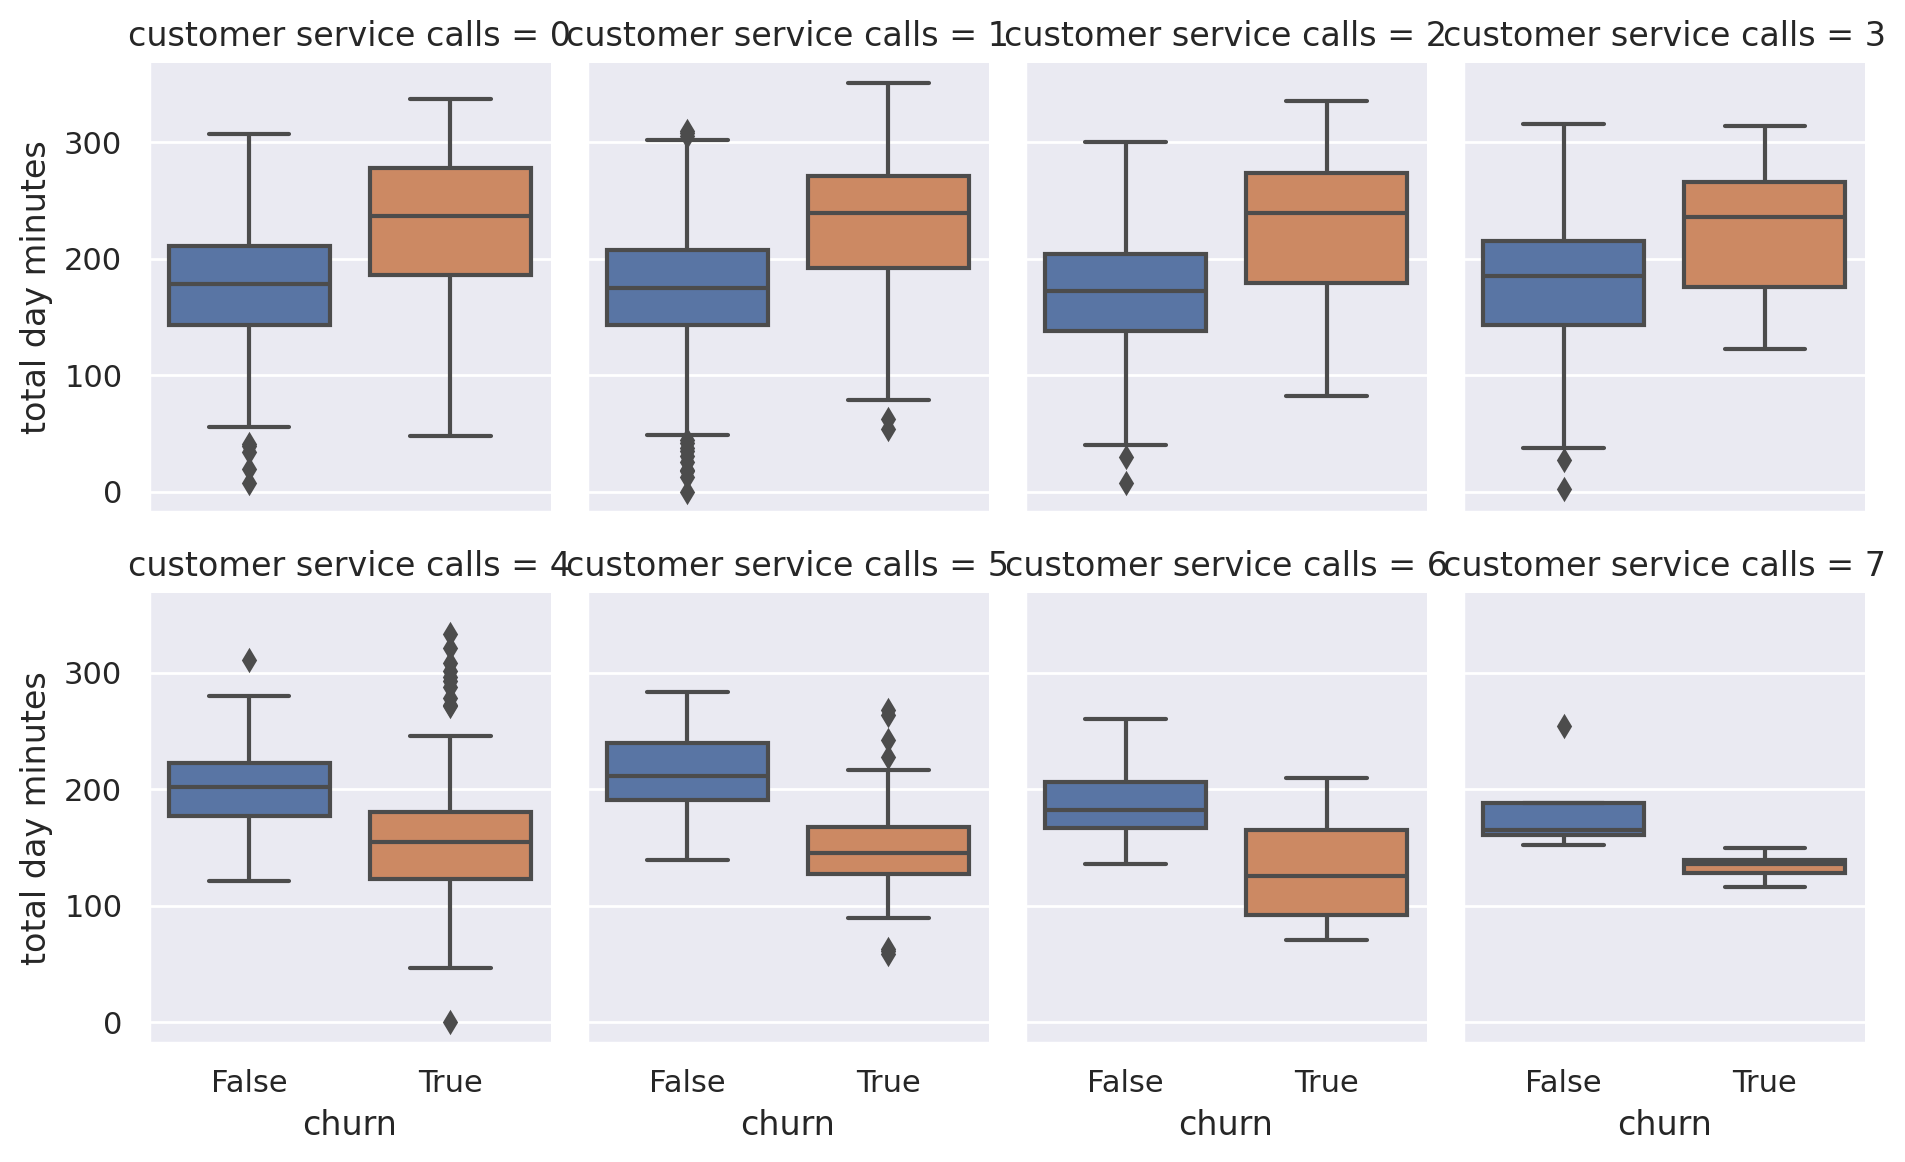

In [88]:
sns.catplot(x="churn",y="total day minutes",col="customer service calls",
            data=df[df["customer service calls"] < 8],kind="box",
            col_wrap=4, height=3, aspect=0.8, );

## 3.3 Categorical vs. Categorical


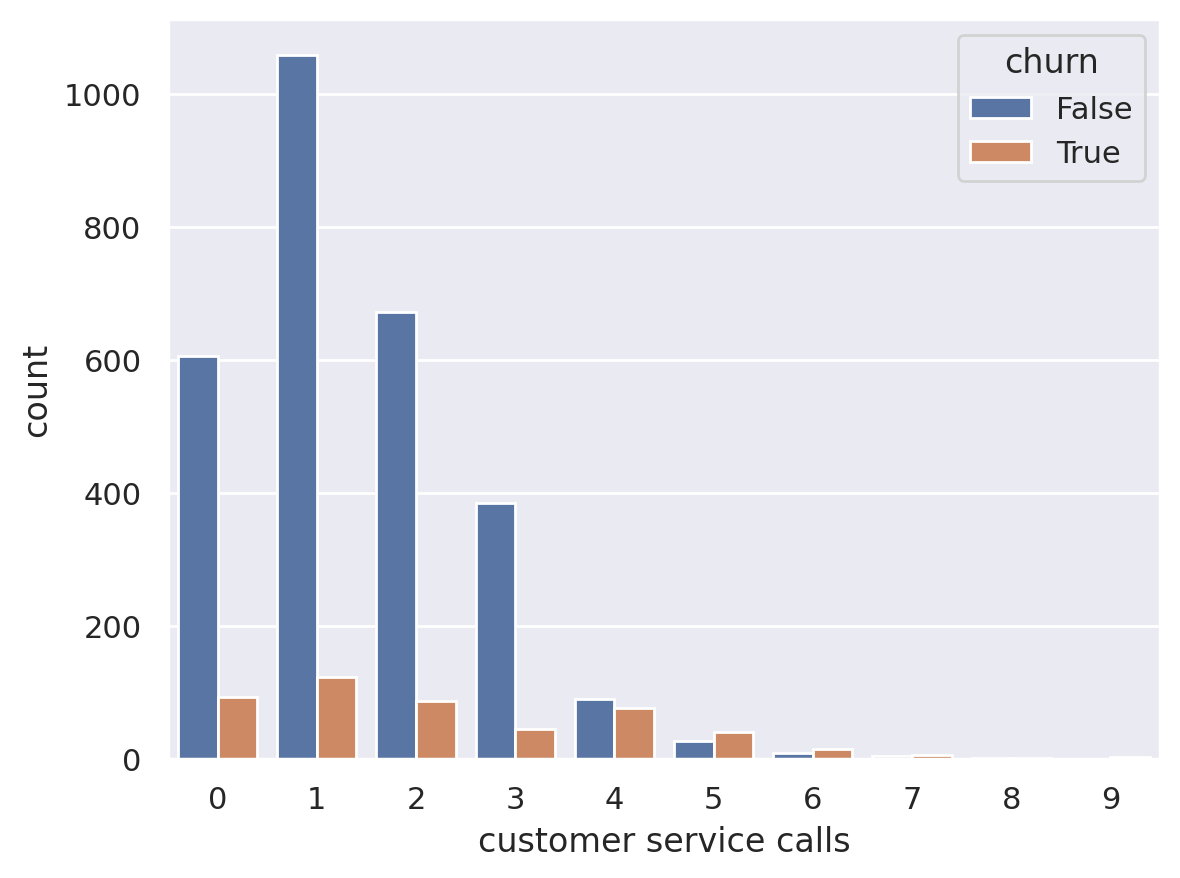

In [89]:
sns.countplot(x="customer service calls", hue="churn", data=df);

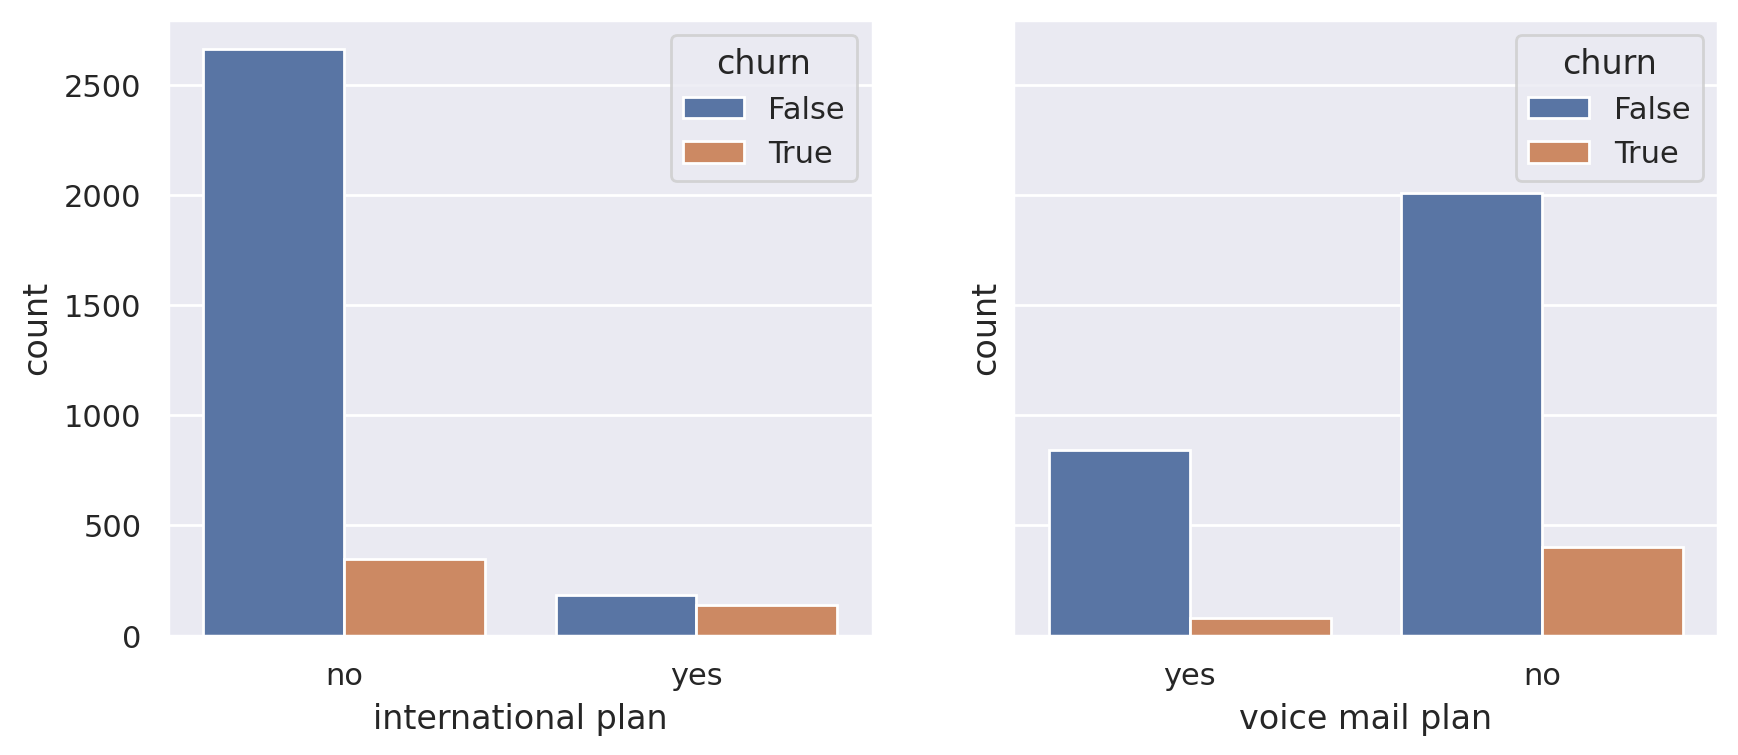

In [90]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="international plan", hue="churn", data=df, ax=axes[0])
sns.countplot(x="voice mail plan", hue="churn", data=df, ax=axes[1]);

### Contingency table
In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a contingency table, also called a cross tabulation. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

In [91]:
pd.crosstab(df["state"], df["churn"]).T

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [92]:
df.groupby(["state"])["churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


## 4.Whole dataset visualizations
### 4.1 A naive approach
-  We have only dealt with two to three variables at once and were easily able to observe the structure and relationships in data. But, what if we want to display all the features and still be able to interpret the resulting visualization?

- We could use hist() or create a scatterplot matrix with pairplot() for the whole dataset to look at all of our features simultaneously. 


### 4.2 Dimensionality reduction
Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is Principal Component Analysis (PCA), which we will study later in this course. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is t-SNE.